In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colors import ListedColormap, Normalize, LinearSegmentedColormap


In [4]:
remates = pd.read_csv('remates.csv')

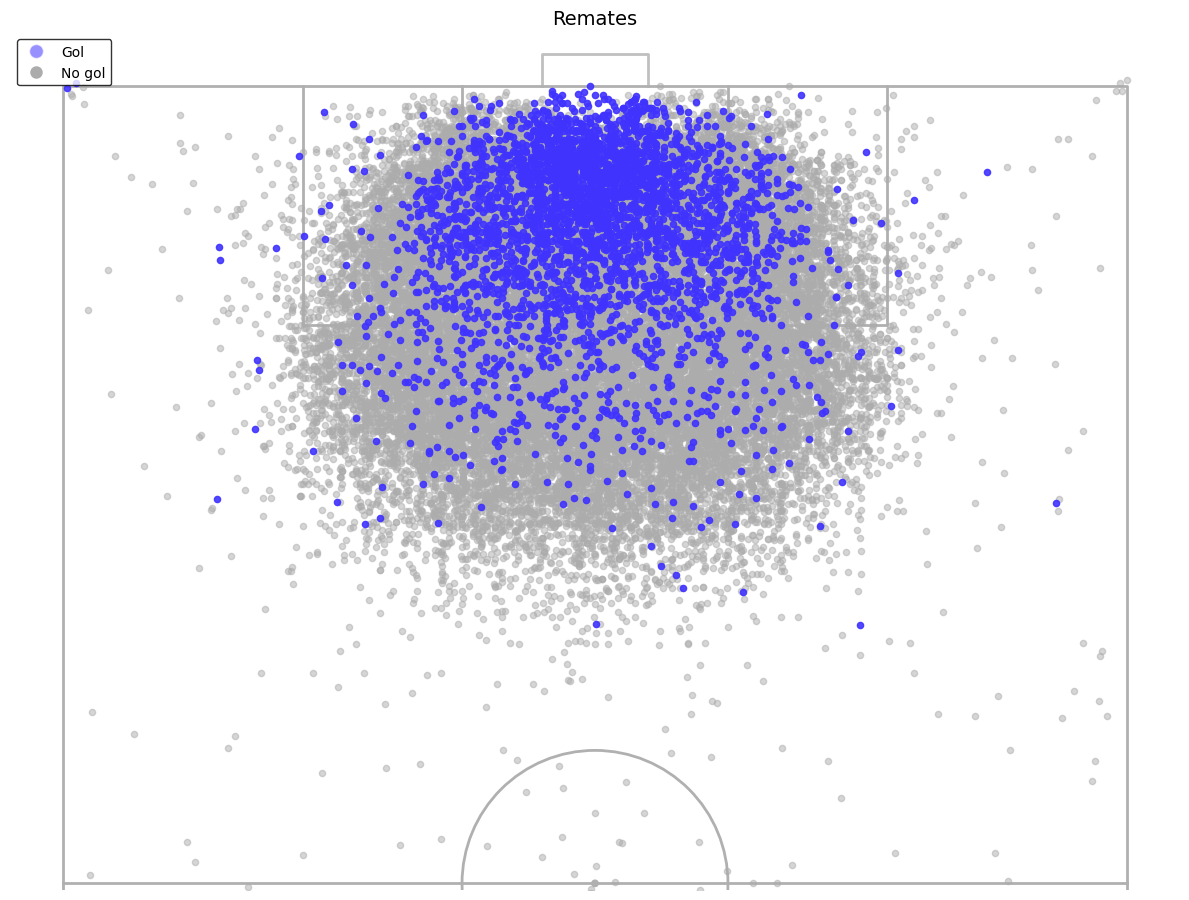

In [5]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

muestra = remates.sample(frac=1, random_state=42)

# Crear el campo vertical
pitch = VerticalPitch(pad_bottom=0.5, half=True, goal_type='box',
                      goal_alpha=0.8)

# Crear figura y ejes con fondo oscuro
fig, ax = pitch.draw(figsize=(12, 10))
fig.set_facecolor('white')
ax.set_facecolor('white')

# Scatter para no goles (goal = 0)
pitch.scatter(muestra[muestra['goal'] == 0]['x'],
              muestra[muestra['goal'] == 0]['y'],
              color="#ACACACFF", s=20, alpha=0.5, ax=ax, label='No gol')
# Scatter para goles (goal = 1)
pitch.scatter(muestra[muestra['goal'] == 1]['x'],
              muestra[muestra['goal'] == 1]['y'],
              color="#4033FF8A", s=20, alpha=0.9, ax=ax, label='Gol')

# Leyenda manual
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Gol', markerfacecolor="#4033FF8A", markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No gol', markerfacecolor="#ACACACFF", markersize=10)
]
ax.legend(handles=handles, loc='upper left', frameon=True, facecolor='white', edgecolor='black')

# Título
ax.set_title("Remates", fontsize=14)
plt.show()


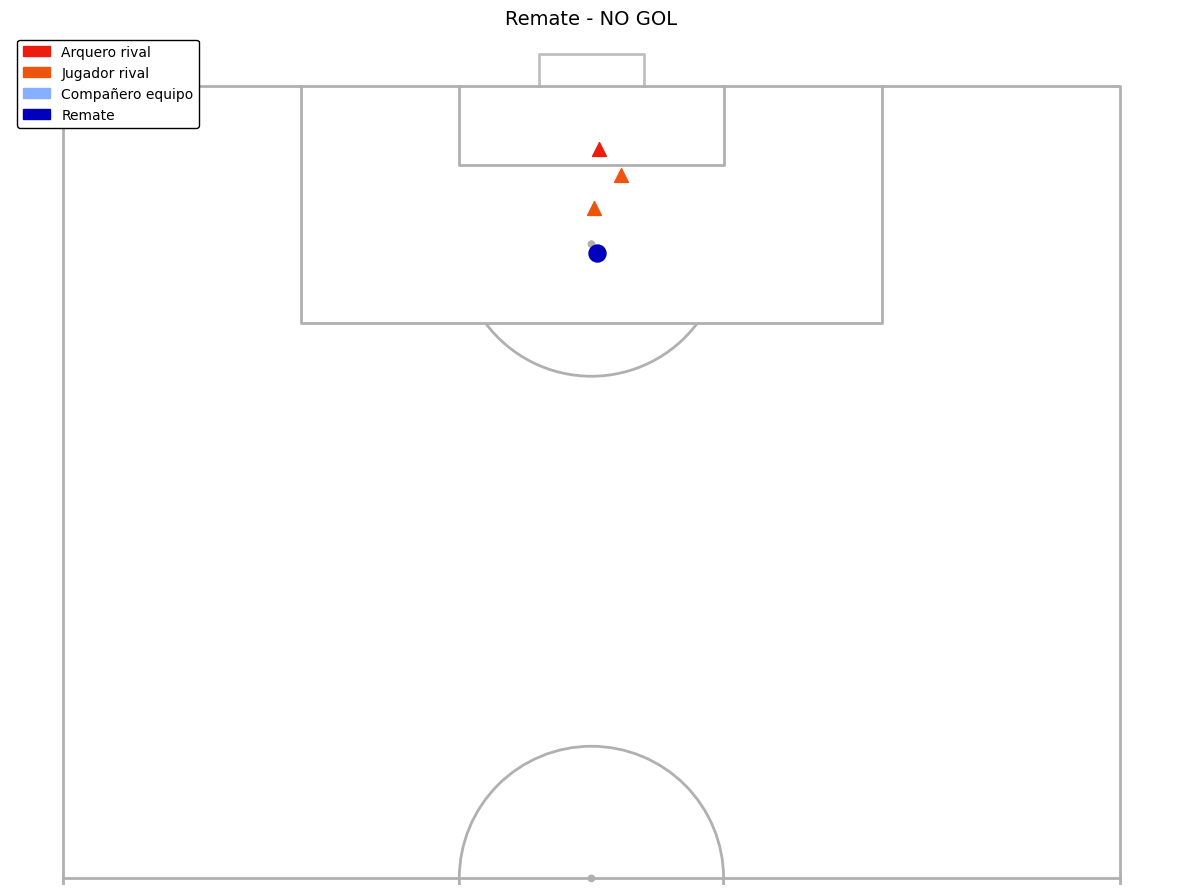

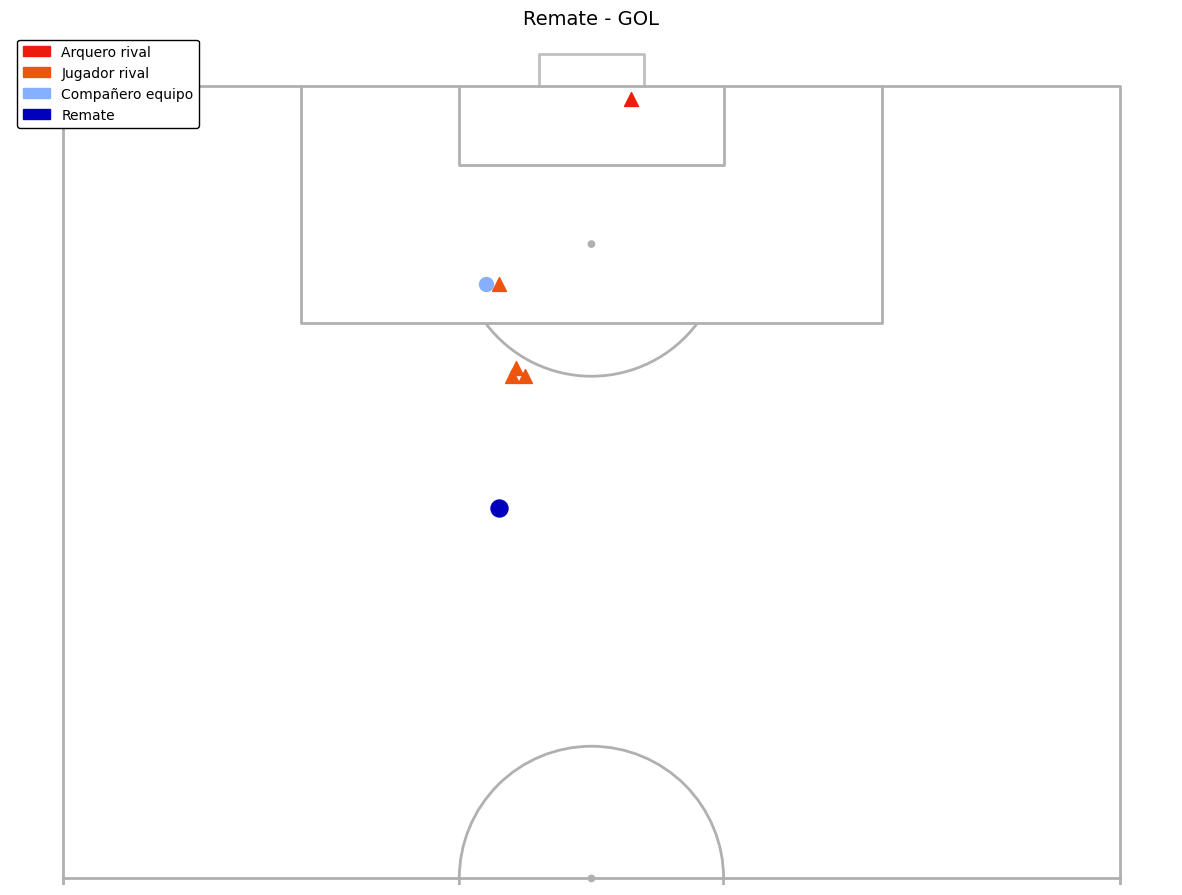

In [6]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt
import ast
from matplotlib.patches import Patch

# --- Elegimos los índices de los remates ---
idx_no_gol = 324
idx_gol = 125  # cambiar por un remate que sea gol

remates_a_graficar = [
    (remates.iloc[idx_no_gol], "#0000BC", "NO GOL"),
    (remates.iloc[idx_gol], "#0000BC", "GOL")
]

# --- Colores de jugadores ---
color_arquero = "#ED1D0E"
color_rival = "#ED550E"
color_compa = "#86B0FF"

# --- Loop para crear una figura por remate ---
for remate, color_remate, label_remate in remates_a_graficar:
    freeze = remate['players_positions_blocking']

    # Convertir string a lista si es necesario
    if isinstance(freeze, str):
        try:
            freeze = ast.literal_eval(freeze)
        except:
            freeze = []

    # Crear cancha
    pitch = VerticalPitch(pad_bottom=0.5, half=True, goal_type='box', goal_alpha=0.8)
    fig, ax = pitch.draw(figsize=(12, 9))
    fig.set_facecolor('white')
    ax.set_facecolor('white')

    # Dibujar remate
    pitch.scatter(remate['x'], remate['y'], s=150, color=color_remate, ax=ax, label=label_remate, zorder=5)

    # Dibujar jugadores
    if isinstance(freeze, list) and len(freeze) > 0:
        for player in freeze:
            x = player.get('x')
            y = player.get('y')
            pos_name = player.get('name', '')
            team = player.get('teammate', False)

            if x is not None and y is not None:
                if not team and pos_name == 'Goalkeeper':
                    color = color_arquero
                    marker = "^"  # Triángulo
                elif not team:
                    color = color_rival
                    marker = "^"  # Triángulo
                else:
                    color = color_compa
                    marker = "o"  # círculo

                pitch.scatter(x, y, s=100, color=color,marker=marker, ax=ax, zorder=3)

    # Leyenda
    legend_handles = [
        Patch(color=color_arquero, label="Arquero rival"),
        Patch(color=color_rival, label="Jugador rival"),
        Patch(color=color_compa, label="Compañero equipo"),
        Patch(color=color_remate, label=f"Remate")
    ]
    ax.legend(handles=legend_handles, loc='upper left', frameon=True, framealpha=1, edgecolor='black')

    # Título
    ax.set_title(f"Remate - {label_remate}", fontsize=14)

    plt.show()

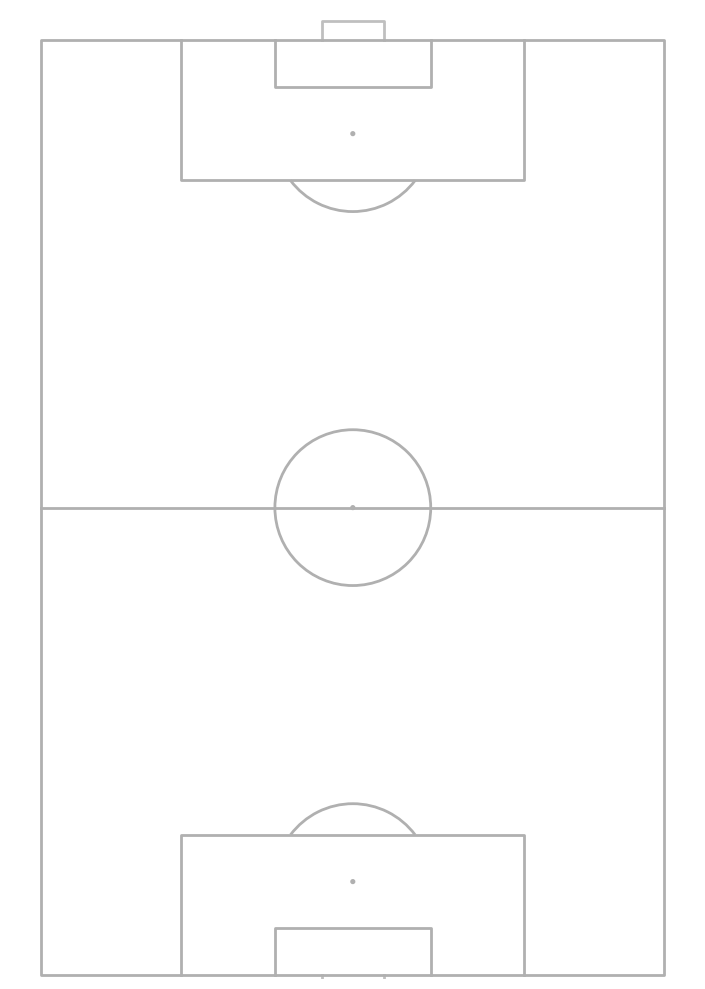

In [8]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt

# Definir área chica
area_chica_x_min = 120 - 6  # 6 yardas ~5.5 metros
area_chica_x_max = 120
area_chica_y_min = 36
area_chica_y_max = 44

# Tomamos una muestra
muestra = remates.sample(50, random_state=42)

# Crear cancha
pitch = VerticalPitch(pad_bottom=0.5, half=False, goal_type='box', goal_alpha=0.8)
fig, ax = pitch.draw(figsize=(14, 10))
ax.set_facecolor('white')
fig.set_facecolor('white')

# Recorrer cada shot_freeze_frame
for _, row in muestra.iterrows():
    frame = row['shot_freeze_frame']
    if isinstance(frame, list):
        for player in frame:
            x, y = player['location']
            # Si el jugador está dentro del área chica
            if area_chica_x_min <= x <= area_chica_x_max and area_chica_y_min <= y <= area_chica_y_max:
                color = 'red' if player['position']['name'] == 'Goalkeeper' else 'orange'
                size = 200 if player['position']['name'] == 'Goalkeeper' else 150
                marker = 's' if player['position']['name'] == 'Goalkeeper' else 'o'
                pitch.scatter(x, y, s=size, color=color, marker=marker, ax=ax)

plt.show()

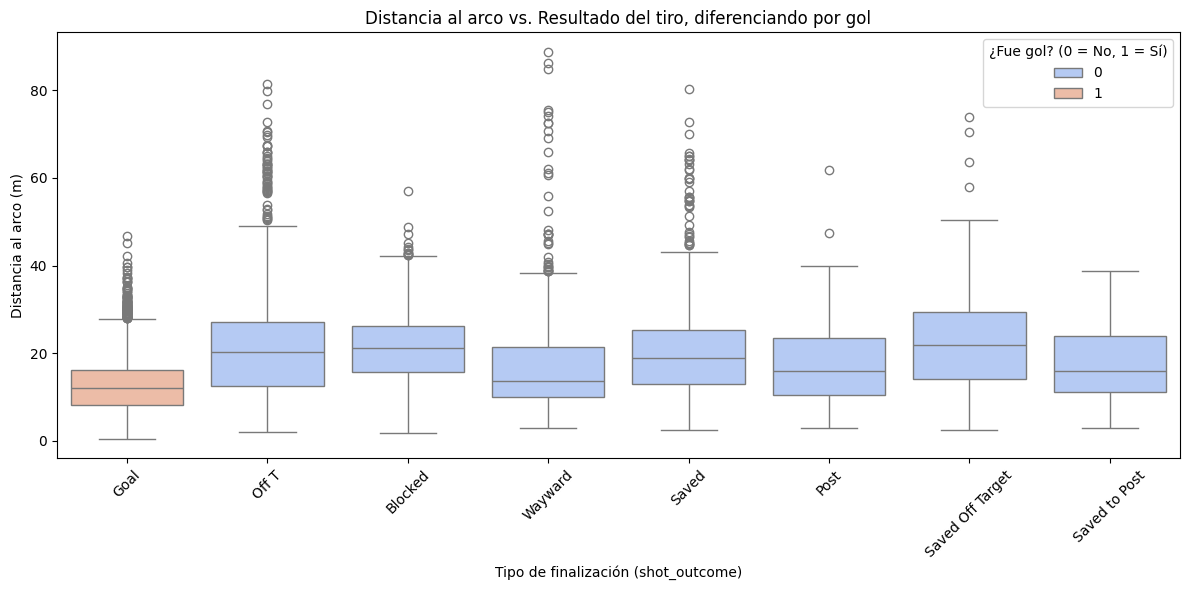

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paleta rocket invertida, 2 colores
colores = sns.color_palette("coolwarm", n_colors=2)


plt.figure(figsize=(12, 6))
sns.boxplot(
    data=remates,
    x='shot_outcome',
    y='distance',
    hue='goal',
    palette=colores
)

plt.title('Distancia al arco vs. Resultado del tiro, diferenciando por gol')
plt.xlabel('Tipo de finalización (shot_outcome)')
plt.ylabel('Distancia al arco (m)')
plt.legend(title='¿Fue gol? (0 = No, 1 = Sí)', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

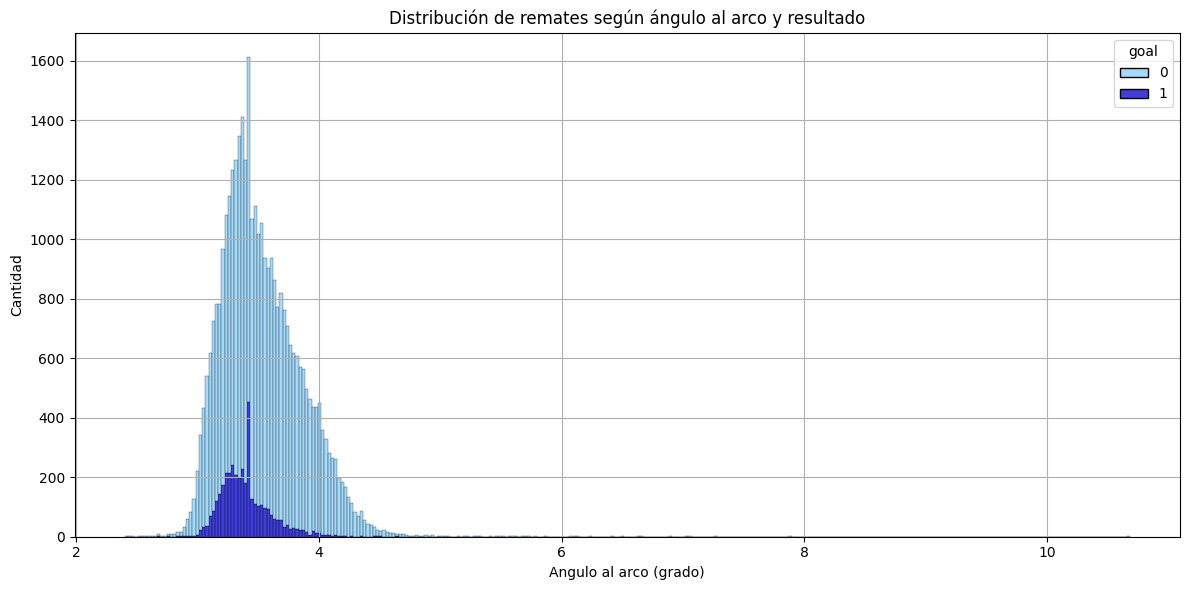

In [10]:
#Grafico de Angulo y Gol
import seaborn as sns
import matplotlib.pyplot as plt
colores = [ '#87CEFA','#0000CD']
cmap = LinearSegmentedColormap.from_list("azul_gradiente", colores)
# Graficar histograma con la muestra
plt.figure(figsize=(12, 6))
sns.histplot(data=remates, x="angle_degrees", hue="goal", multiple="stack", palette=colores)

plt.title("Distribución de remates según ángulo al arco y resultado")
plt.xlabel("Angulo al arco (grado)")
plt.ylabel("Cantidad")
plt.grid(True)
plt.tight_layout()
plt.show()

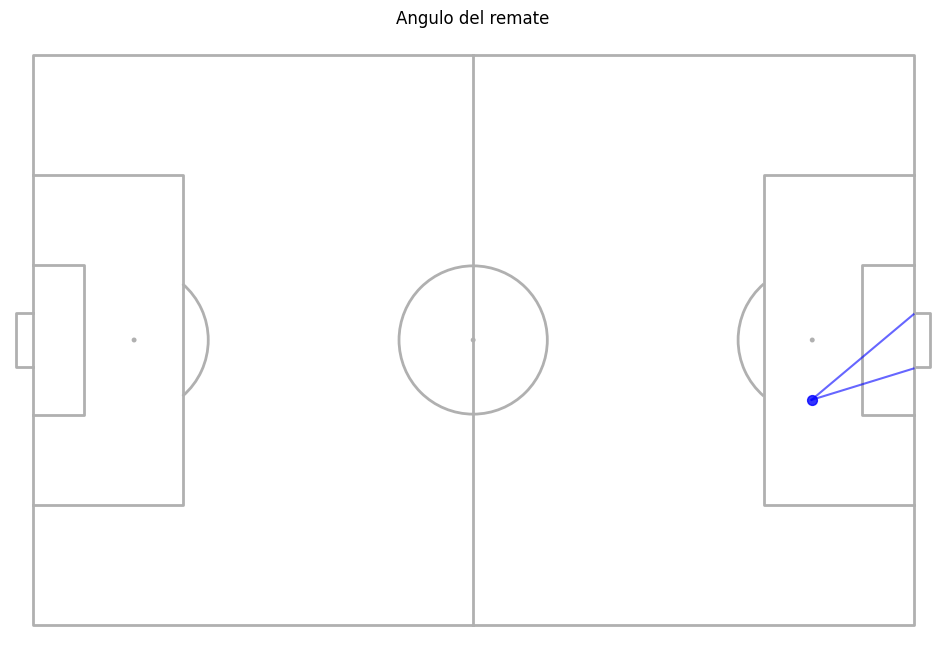

In [11]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import numpy as np

# Filtrar solo remates que fueron gol (o máximo 3 goles)
remates_gol_no_penal = remates[(remates['goal'] == 1) & (remates['shot_type'] != 'Penalty')][:1]

# Crear cancha
fig, ax = plt.subplots(figsize=(12, 8))
pitch = Pitch(pitch_type='opta', goal_type='box')
pitch.draw(ax=ax)

# Coordenadas de los postes del arco
poste_izq_y = 54.5  # arco de 7.32 m centrado en y=40 -> 40 - 3.66
poste_der_y = 45 # 40 + 3.66
arco_x = 100

# Ajustar remates a escala Opta
remates_gol_no_penal['x_opta'] = remates_gol_no_penal['x'] * (100 / 120)
remates_gol_no_penal['y_opta'] = remates_gol_no_penal['y'] * (100 / 80)

# Dibujar línea hacia ambos postes
for idx, row in remates_gol_no_penal.iterrows():
    x0 = row['x_opta']
    y0 = row['y_opta']
    # Línea hacia poste izquierdo
    ax.plot([x0, arco_x], [y0, poste_izq_y], color='Blue', alpha=0.6)
    # Línea hacia poste derecho
    ax.plot([x0, arco_x], [y0, poste_der_y], color='Blue', alpha=0.6)

# Opcional: puntos donde se realizaron los tiros
ax.scatter(remates_gol_no_penal['x_opta'], remates_gol_no_penal['y_opta'], c='Blue', s=50, alpha=0.8, label='Gol')

ax.set_title("Angulo del remate")

plt.show()



Goles dentro y fuera del área:
shot_area
True     3340
False     483
Name: count, dtype: int64


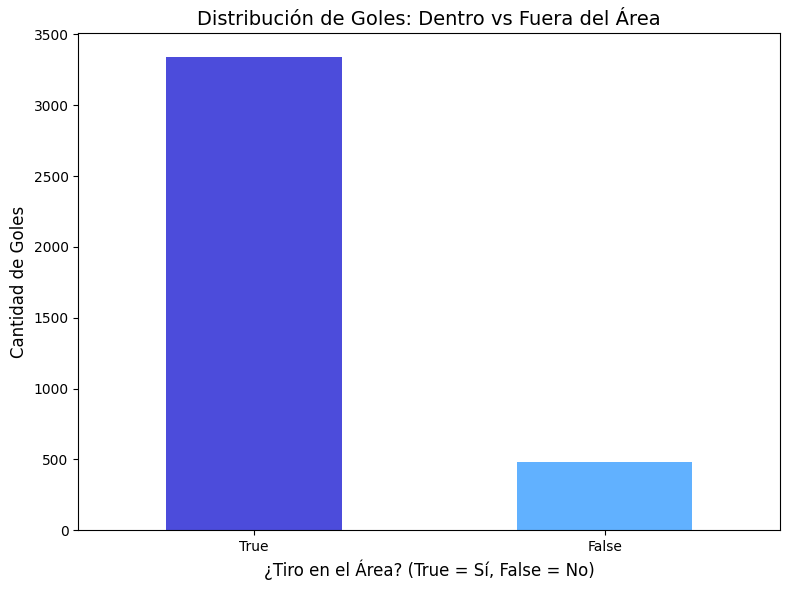

In [12]:

colores = ['#0000CD', '#1E90FF', '#87CEFA']
cmap = LinearSegmentedColormap.from_list("azul_gradiente", colores)

# Filtrar solo los remates que fueron goles
goles = remates[remates['goal'] == 1]

# Contar cuántos goles fueron dentro y fuera del área
goles_por_area = goles['shot_area'].value_counts()

# Mostrar los resultados
print("Goles dentro y fuera del área:")
print(goles_por_area)

# Visualizar con un gráfico de barras
plt.figure(figsize=(8, 6))
goles_por_area.plot(kind='bar', alpha=0.7, color=colores)
plt.title('Distribución de Goles: Dentro vs Fuera del Área', fontsize=14)
plt.xlabel('¿Tiro en el Área? (True = Sí, False = No)', fontsize=12)
plt.ylabel('Cantidad de Goles', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Goles por técnica de remate (traducido):
shot_technique
Chilena / Tijera      16
Taco                  17
Palomita              28
Globito               79
Volea                279
Media volea          473
Remate normal       2931
Name: count, dtype: int64


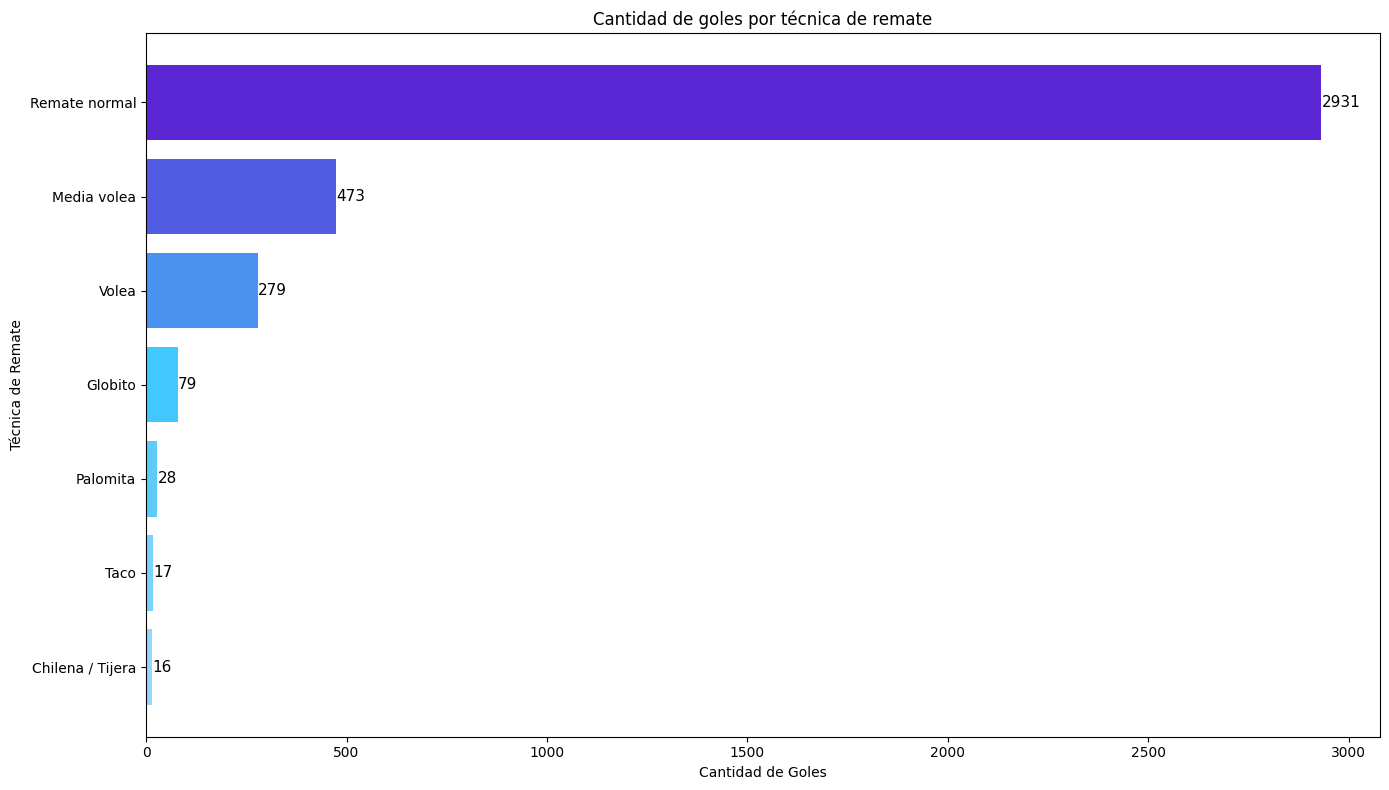

In [13]:
colores_base = ["#3E00CD", "#1EBFFF", '#87CEFA']
cmap = LinearSegmentedColormap.from_list("azul_gradiente", colores_base)
goles = remates[remates['goal'] == 1]

# ---- Traducción de técnicas ----
traduccion_tecnica = {
    'Overhead Kick': 'Chilena / Tijera',
    'Backheel': 'Taco',
    'Diving Header': 'Palomita',
    'Lob': 'Globito',
    'Volley': 'Volea',
    'Half Volley': 'Media volea',
    'Normal': 'Remate normal'
}

# Contar goles por técnica de remate
goles_por_tecnica = goles['shot_technique'].value_counts().sort_values(ascending=True)

# Reemplazar por nombres traducidos
goles_por_tecnica.index = goles_por_tecnica.index.map(traduccion_tecnica)

# Mostrar en consola
print("Goles por técnica de remate (traducido):")
print(goles_por_tecnica)
n_barras = len(goles_por_tecnica)
# Gradiente de arriba (barra superior) a abajo (barra inferior)
colores = [cmap(i/(n_barras-1)) for i in reversed(range(n_barras))]
# ---- Gráfico ----
plt.figure(figsize=(14, 8))
bars = plt.barh(
    goles_por_tecnica.index,
    goles_por_tecnica.values,
    color=colores[:len(goles_por_tecnica)],
    alpha=0.85
)

# Agregar valores al final de cada barra
for bar in bars:
    ancho = bar.get_width()
    plt.text(ancho + 0.5, bar.get_y() + bar.get_height()/2,
             str(int(ancho)), va='center', fontsize=11)

plt.xlabel('Cantidad de Goles')
plt.ylabel('Técnica de Remate')
plt.title('Cantidad de goles por técnica de remate')
plt.tight_layout()
plt.show()


['foot' 'head' 'other']


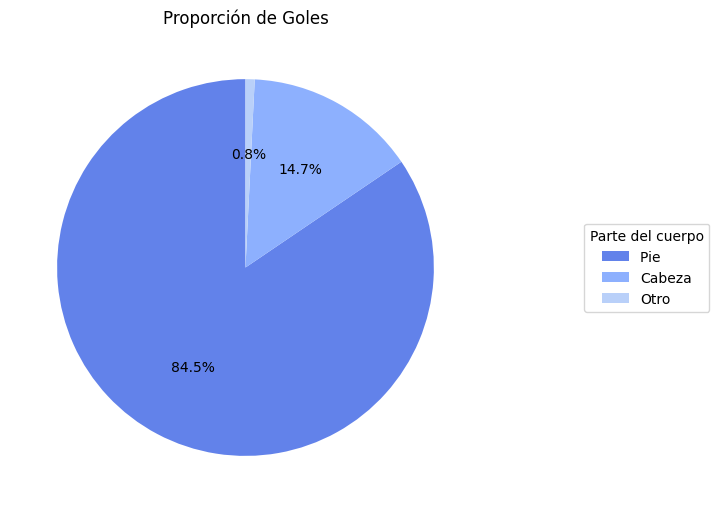

In [14]:
import matplotlib.pyplot as plt

# Traducción de las categorías al español
traducciones = {
    'foot':'Pie ',
    'head':'Cabeza',
    'other': 'Otro'
    }

colores = sns.color_palette("coolwarm", n_colors=7)


# Calcular los totales por técnica de disparo
totales = remates.groupby('body_part_category')['goal'].sum()
print(remates['body_part_category'].unique())


# Aplicar traducciones
totales.index = totales.index.map(traducciones)

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(8, 8))  # Ajustar el tamaño del gráfico
wedges, texts, autotexts = ax.pie(
    totales,
    autopct='%1.1f%%',  # Mostrar porcentajes
    startangle=90,      # Rotar el inicio del gráfico
    colors=colores
)

# Agregar leyenda
ax.legend(
    wedges,
    totales.index,
    title="Parte del cuerpo",
    loc="center right",
    bbox_to_anchor=(1, 0, 0.5, 1)  # Posición de la leyenda
)

# Personalizar el gráfico
plt.setp(autotexts, size=10)  # Personalizar los porcentajes
ax.set_title('Proporción de Goles', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()






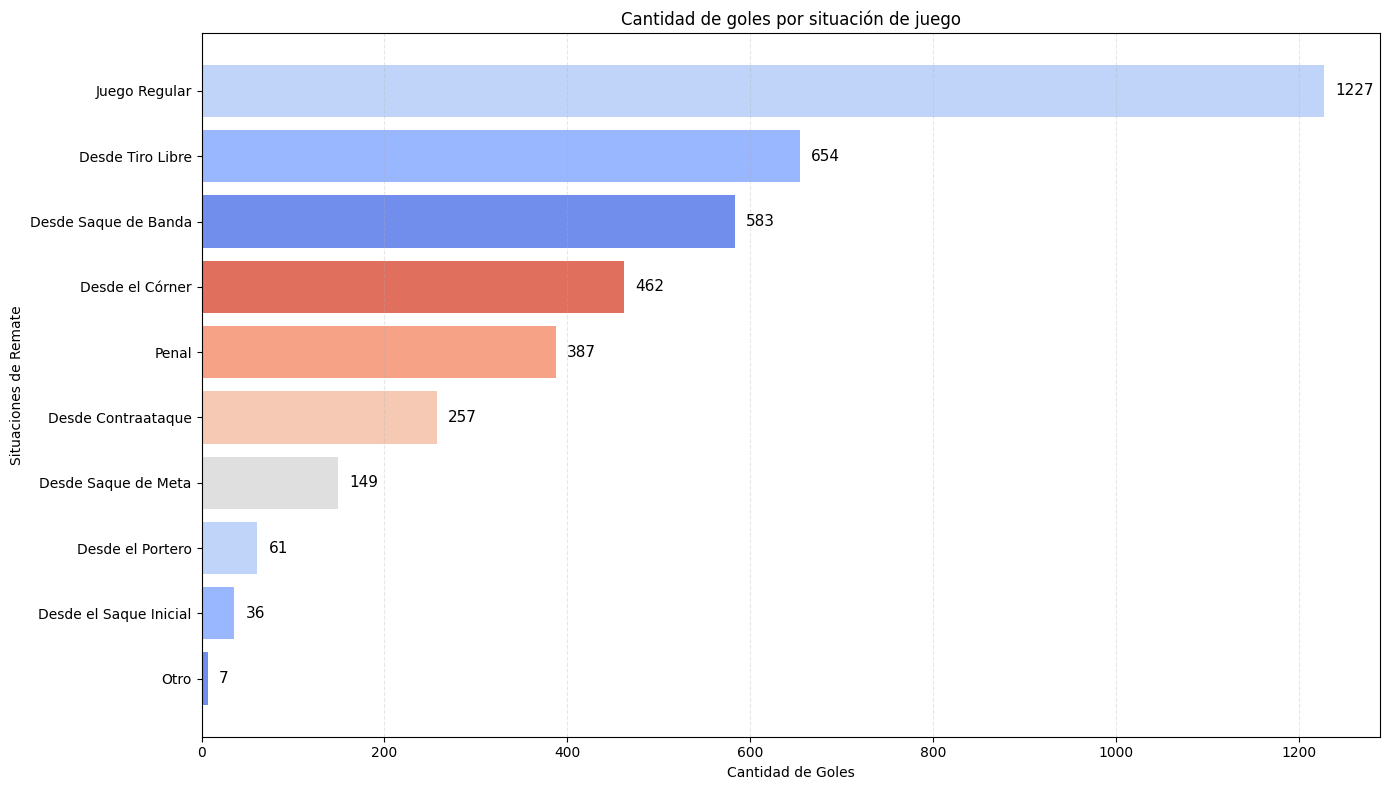

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

colores_base = ["#3E00CD", "#1EBFFF", '#87CEFA']
cmap = LinearSegmentedColormap.from_list("azul_gradiente", colores_base)
# ---- Traducción de las categorías al español ----
traducciones = {
    'Penalty': 'Penal',
    'Other': 'Otro',
    'Regular Play': 'Juego Regular',
    'From Throw In': 'Desde Saque de Banda',
    'From Keeper': 'Desde el Portero',
    'From Corner': 'Desde el Córner',
    'From Counter': 'Desde Contraataque',
    'From Free Kick': 'Desde Tiro Libre',
    'From Goal Kick': 'Desde Saque de Meta',
    'From Kick Off': 'Desde el Saque Inicial'
}
\

# ---- Calcular totales de goles por tipo de jugada ----
totales = remates.groupby('play_pattern')['goal'].sum().sort_values(ascending=True)

# Aplicar traducciones (evita errores si hay valores faltantes)
totales.index = totales.index.map(lambda x: traducciones.get(x, x))

# ---- Gráfico de barras horizontales ----
plt.figure(figsize=(14, 8))
bars = plt.barh(
    totales.index,
    totales.values,
    color=colores[:len(totales)],
    alpha=0.9
)

# ---- Agregar valores al final de cada barra ----
for bar in bars:
    ancho = bar.get_width()
    plt.text(ancho + totales.max() * 0.01,  # desplazamiento relativo
             bar.get_y() + bar.get_height() / 2,
             f"{int(ancho)}",
             va='center', fontsize=11)
    
n_barras = len(totales)
# Gradiente de arriba (barra superior) a abajo (barra inferior)
colores = [cmap(i/(n_barras-1)) for i in reversed(range(n_barras))]
# ---- Etiquetas y estilo ----
plt.xlabel('Cantidad de Goles')
plt.ylabel('Situaciones de Remate')
plt.title('Cantidad de goles por situación de juego')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

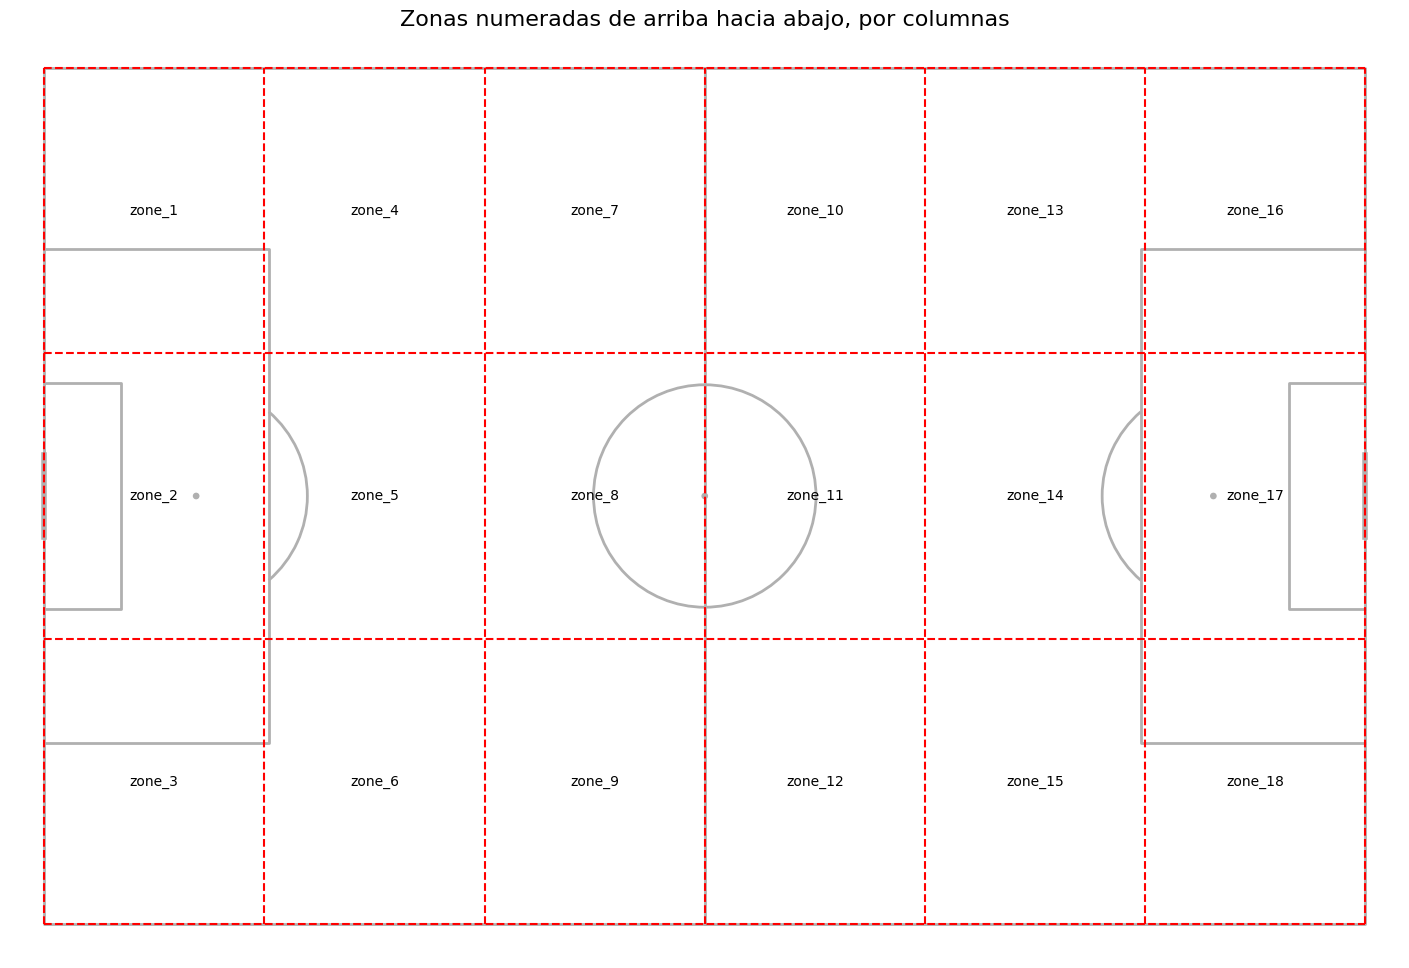

In [16]:
import numpy as np
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Crear el campo
pitch = Pitch(pitch_type='opta')

# Divisiones automáticas: 6 columnas, 3 filas
x_divisions = np.linspace(0, 100, 7)  # 6 columnas = 7 cortes
y_divisions = np.linspace(0, 100, 4)  # 3 filas = 4 cortes

# Crear zonas: de arriba hacia abajo, columna por columna
zone_areas = {}
zone_id = 1
for i in range(len(x_divisions) - 1):  # columnas de izquierda a derecha
    for j in reversed(range(len(y_divisions) - 1)):  # filas de arriba hacia abajo
        zone_areas[f'zone_{zone_id}'] = {
            'x_lower_bound': x_divisions[i],
            'x_upper_bound': x_divisions[i + 1],
            'y_lower_bound': y_divisions[j],
            'y_upper_bound': y_divisions[j + 1],
        }
        zone_id += 1

# Visualizar
fig, ax = plt.subplots(figsize=(20, 12))
pitch.draw(ax=ax)

# Etiquetas de zona
for zone, bounds in zone_areas.items():
    x_center = (bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2
    y_center = (bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2
    ax.text(x_center, y_center, zone, ha='center', va='center', fontsize=10)

# Dibujar líneas divisorias
for x in x_divisions:
    ax.plot([x, x], [0, 100], ls='--', color='red')

for y in y_divisions:
    ax.plot([0, 100], [y, y], ls='--', color='red')

plt.title("Zonas numeradas de arriba hacia abajo, por columnas", fontsize=16)
plt.show()


In [17]:
# Devuelve el nombre de la zona en la que cae el disparo según sus coordenadas x, y.
def get_shot_zone(x, y): 

    global zone_areas

    zone = next(
        (
            z for z, bounds in zone_areas.items()
            if bounds['x_lower_bound'] <= x <= bounds['x_upper_bound']
            and bounds['y_lower_bound'] <= y <= bounds['y_upper_bound']
        ),
        None  # Valor por defecto si no encuentra zona
    )
    return zone

In [18]:

# Asegúrate de que las coordenadas estén en escala Opta (0 a 100)
# Si tus datos vienen en StatsBomb (0-120 x, 0-80 y), transformalos:

# Transformar coordenadas de StatsBomb a escala Opta
remates['x_opta'] = remates['x'] * (100 / 120)  # Escalar x de 0-120 a 0-100
remates['y_opta'] = remates['y'] * (100 / 80)   # Escalar y de 0-80 a 0-100

# Aplicar la función para obtener la zona
remates['zona'] = remates.apply(lambda row: get_shot_zone(row['x_opta'], row['y_opta']), axis=1)

# Mostrar las primeras filas con las columnas relevantes
print(remates[['x', 'y', 'x_opta', 'y_opta', 'zona']].head())

       x     y     x_opta  y_opta     zona
0  108.2  40.1  90.166667  50.125  zone_17
1   91.9  43.1  76.583333  53.875  zone_14
2   90.2  59.3  75.166667  74.125  zone_13
3   95.2  47.2  79.333333  59.000  zone_14
4  113.0  59.5  94.166667  74.375  zone_16


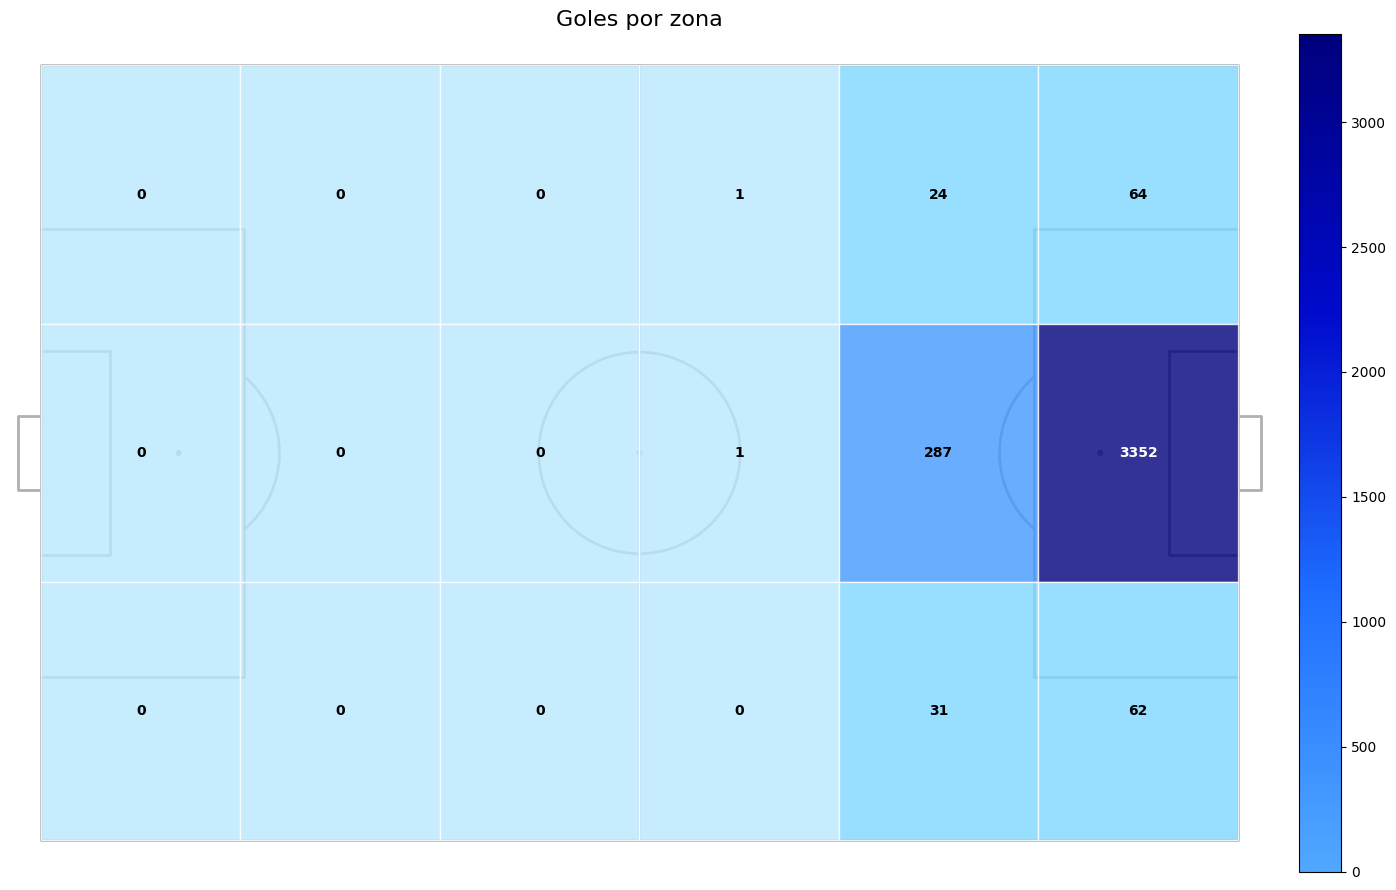

In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mplsoccer import Pitch
import seaborn as sns
from matplotlib.colors import ListedColormap, Normalize

# Crear las estadísticas de goles por zona
zonas_stats = remates.groupby('zona').agg(
    remates_totales=('zona', 'count'),
    goles=('goal', 'sum')
).reset_index()

goles_dict = dict(zip(zonas_stats['zona'], zonas_stats['goles']))

# Crear cancha tipo Opta
fig = plt.figure(figsize=(16, 9), dpi=100)
ax = plt.subplot(111)
pitch = Pitch(pitch_type='opta', goal_type='box')
pitch.draw(ax=ax)

# Paleta azul de oscuro a claro
colores_base = ["#51A8FF","#1E6DFF", "#000ACD","#00007C"]
cmap = LinearSegmentedColormap.from_list("azul_gradiente", colores_base)

# Normalización (vmin = 0 para que empiece más oscuro)
vmin = 0  # fijar a 0 para que el azul arranque más intenso
vmax = zonas_stats['goles'].max()
norm = Normalize(vmin=vmin, vmax=vmax)
# --- Pintar cada zona ---
# --- Pintar cada zona ---
for zone, bounds in zone_areas.items():
    goles = goles_dict.get(zone, 0)

    if goles < 10:
        color_fondo = "#B9E8FE"  # celeste muy claro
    elif goles < 70:
        color_fondo = "#7DD6FF"  # celeste más intenso
    else:
        color_fondo = cmap(norm(goles))  # gradiente normal

    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=color_fondo,
        alpha=0.8,
        ec='white'
    )
    ax.add_patch(rect)

    # Determinar color del texto según brillo del fondo
    brillo = sum(color_fondo[:3]) / 3 if isinstance(color_fondo, tuple) else 0.8
    color_texto = 'black' if brillo > 0.6 else 'white'

    ax.text(
        x=(bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        y=(bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        s=f"{goles}",
        color=color_texto,
        ha='center',
        va='center',
        fontsize=10,
        weight='bold'
    )


sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) 
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02) 
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), 
         color='black') # Fijar ticks manualmente 
plt.title("Goles por zona", fontsize=16) 
plt.tight_layout() 
plt.show()

        zona  remates_totales  goles
0    zone_14            11181    309
1   zone_17a             5705    428
2  zone_17b1             6847   1215
3  zone_17b2             6038   1444
4   zone_17c             5122    413


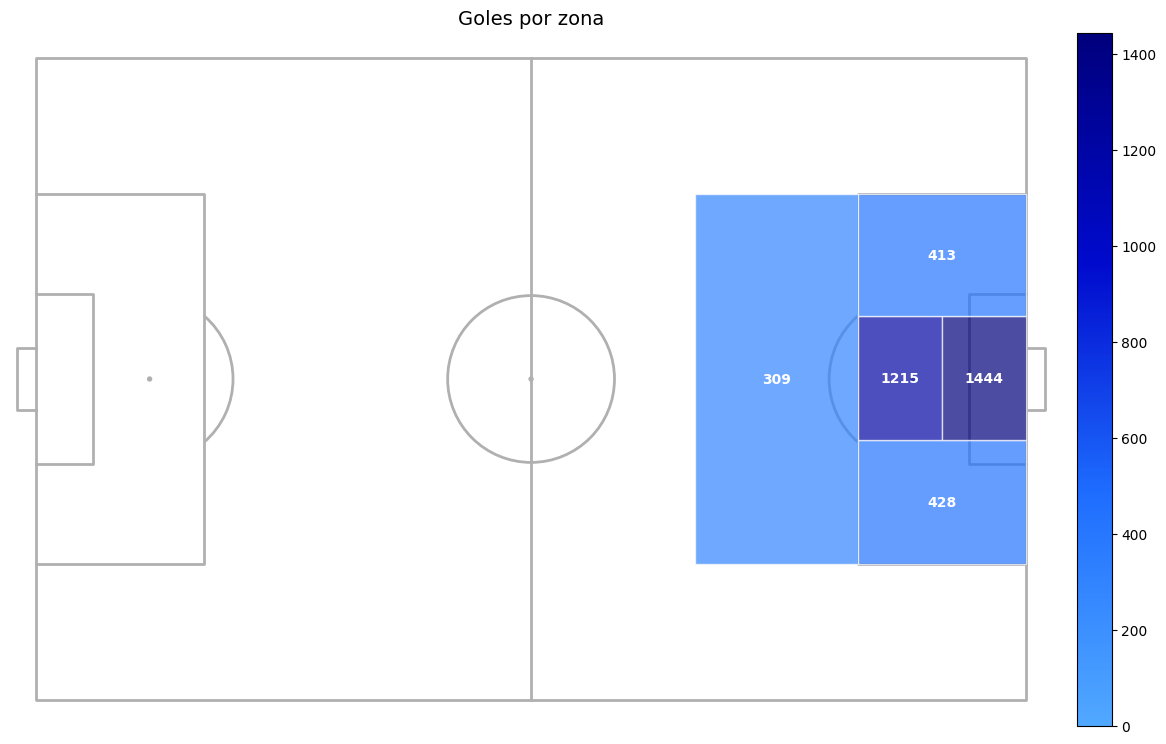

In [20]:
# Importar librerías necesarias
from statsbombpy import sb
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mplsoccer import Pitch, VerticalPitch

# Definir zonas del campo
zone_areas = {
    'zone_17a': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 21.1, 'y_upper_bound': 40.43
    },
    'zone_17b1': {  # LADO IZQUIERDO
        'x_lower_bound': 83, 'x_upper_bound': 91.5,
        'y_lower_bound': 40.43, 'y_upper_bound': 59.76
    },
    'zone_17b2': {  # LADO DERECHO
        'x_lower_bound': 91.5, 'x_upper_bound': 100,
        'y_lower_bound': 40.43, 'y_upper_bound': 59.76
    },
    'zone_17c': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 59.76, 'y_upper_bound': 78.9
    },
    'zone_14': {
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9
    },
}

# Asegurate de que las coordenadas estén en escala Opta (0 a 100)
# Si tus datos vienen en StatsBomb (0-120 x, 0-80 y), transformalos:
remates['x_opta'] = remates['x'] * (100 / 120)
remates['y_opta'] = remates['y'] * (100 / 80)

# Aplicar la función para obtener la zona
remates['zona'] = remates.apply(lambda row: get_shot_zone(row['x_opta'], row['y_opta']), axis=1)
 
 
# Función para asignar zonas
def assign_shot_zone(x, y):
    for zone, bounds in zone_areas.items():
        if (x >= bounds['x_lower_bound']) and (x <= bounds['x_upper_bound']):
            if (y >= bounds['y_lower_bound']) and (y <= bounds['y_upper_bound']):
                return zone
    return 'zona desconocida'

# Crear las estadísticas de goles por zona
zonas_stats = remates.groupby('zona').agg(
    remates_totales=('zona', 'count'),
    goles=('goal', 'sum')
).reset_index()

print(zonas_stats)

# Crear un diccionario para acceso rápido con los goles por zona
goles_dict = dict(zip(zonas_stats['zona'], zonas_stats['goles']))

# Crear cancha tipo Opta
fig = plt.figure(figsize=(16, 9), dpi=100)
ax = plt.subplot(111)
pitch = Pitch(pitch_type='opta', goal_type='box')
pitch.draw(ax=ax)

# Color map
# Paleta azul de oscuro a claro
colores_base = ["#51A8FF","#1E6DFF", "#000ACD","#00007C"]
cmap = LinearSegmentedColormap.from_list("azul_gradiente", colores_base)

# Normalización (vmin = 0 para que empiece más oscuro)
vmin = 0  # fijar a 0 para que el azul arranque más intenso
vmax = zonas_stats['goles'].max()
norm = Normalize(vmin=vmin, vmax=vmax)
# Pintar cada zona
# Pintar cada zona
for zone, bounds in zone_areas.items():
    goles = goles_dict.get(zone, 0)  # Si no hay datos, usa 0
    # Color especial para menos de 450 goles
    if goles < 10:
        color_fondo = "#A1E1FF"  # celeste muy claro, distinto del gradiente principal
    else:
        color_fondo = cmap(norm(goles))

    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=color_fondo,  # <- aquí usamos color_fondo
        alpha=0.7,
        ec='white'
    )
    ax.add_patch(rect)
        # Determinar color del texto según brillo del fondo
    brillo = sum(color_fondo[:3]) / 3 if isinstance(color_fondo, tuple) else 0.8
    color_texto = 'black' if brillo > 0.6 else 'white'
    # Texto con goles
    ax.text(
        x=(bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        y=(bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        s=f"{goles}",
        color='white',
        ha='center',
        va='center',
        fontsize=10,
        weight='bold'
    )
# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
plt.title("Goles por zona", fontsize=14) 

plt.show()


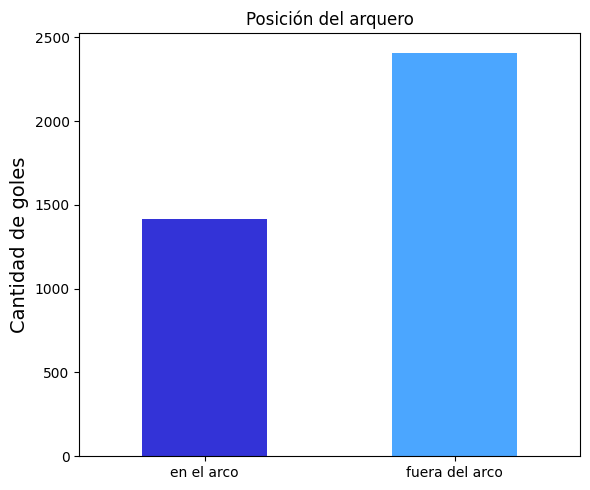

In [21]:
import matplotlib.pyplot as plt

colores = ['#0000CD', '#1E90FF', '#87CEFA']
cmap = LinearSegmentedColormap.from_list("azul_gradiente", colores)
# Contar goles según si el arquero estaba en el arco o no
goles_por_arquero = remates[remates['goal'] == 1]['goalkeeper_ingoal'].value_counts().reindex([True, False], fill_value=0)

# Calcular la diferencia
diferencia = goles_por_arquero[False] - goles_por_arquero[True]

# Gráfico de barras
plt.figure(figsize=(6, 5))
goles_por_arquero.plot(kind='bar', color=colores, alpha=0.8)
plt.xticks([0, 1], ['en el arco', 'fuera del arco'], rotation=0)
plt.ylabel('Cantidad de goles',fontsize=14) 

plt.xlabel('')

plt.title(f'Posición del arquero')
plt.tight_layout()
plt.show()

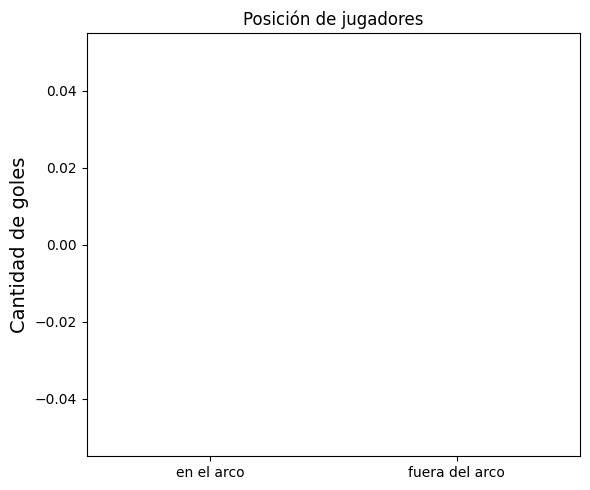

In [22]:
import matplotlib.pyplot as plt

colores = ['#0000CD', '#1E90FF', '#87CEFA']
cmap = LinearSegmentedColormap.from_list("azul_gradiente", colores)
# Contar goles según si el arquero estaba en el arco o no
goles_por_intervencion = remates[remates['goal'] == 1]['players_in_box'].value_counts().reindex([True, False], fill_value=0)

# Calcular la diferencia
diferencia = goles_por_intervencion[False] - goles_por_intervencion[True]

# Gráfico de barras
plt.figure(figsize=(6, 5))
goles_por_intervencion.plot(kind='bar', color=colores, alpha=0.8)
plt.xticks([0, 1], ['en el arco', 'fuera del arco'], rotation=0)
plt.ylabel('Cantidad de goles',fontsize=14) 

plt.xlabel('')

plt.title(f'Posición de jugadores')
plt.tight_layout()
plt.show()

shot_aerial_won
True      217
False    3606
Name: count, dtype: int64


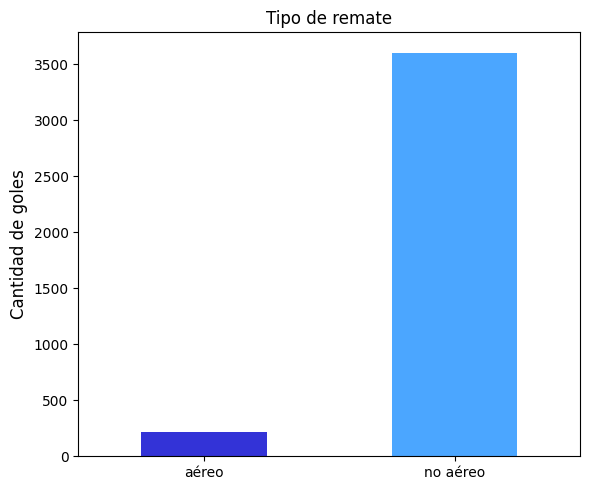

In [23]:
import matplotlib.pyplot as plt

colores = ['#0000CD', '#1E90FF', '#87CEFA']
cmap = LinearSegmentedColormap.from_list("azul_gradiente", colores)
# Filtrar solo goles y agrupar por shot_aerial_won
goles = remates[remates['goal'] == 1]

# Agrupar por shot_aerial_won (True/False)
goles_aerial = goles['shot_aerial_won'].value_counts().reindex([True, False], fill_value=0)

# Mostrar la tabla
print(goles_aerial)

# Gráfico de barras
plt.figure(figsize=(6, 5))
goles_aerial.plot(kind='bar', color=colores, alpha=0.8)
plt.xticks([0, 1], ['aéreo', 'no aéreo'], rotation=0)
plt.ylabel('Cantidad de goles',fontsize=12)
plt.xlabel('')
plt.title('Tipo de remate',fontsize=12)
plt.tight_layout()
plt.show()

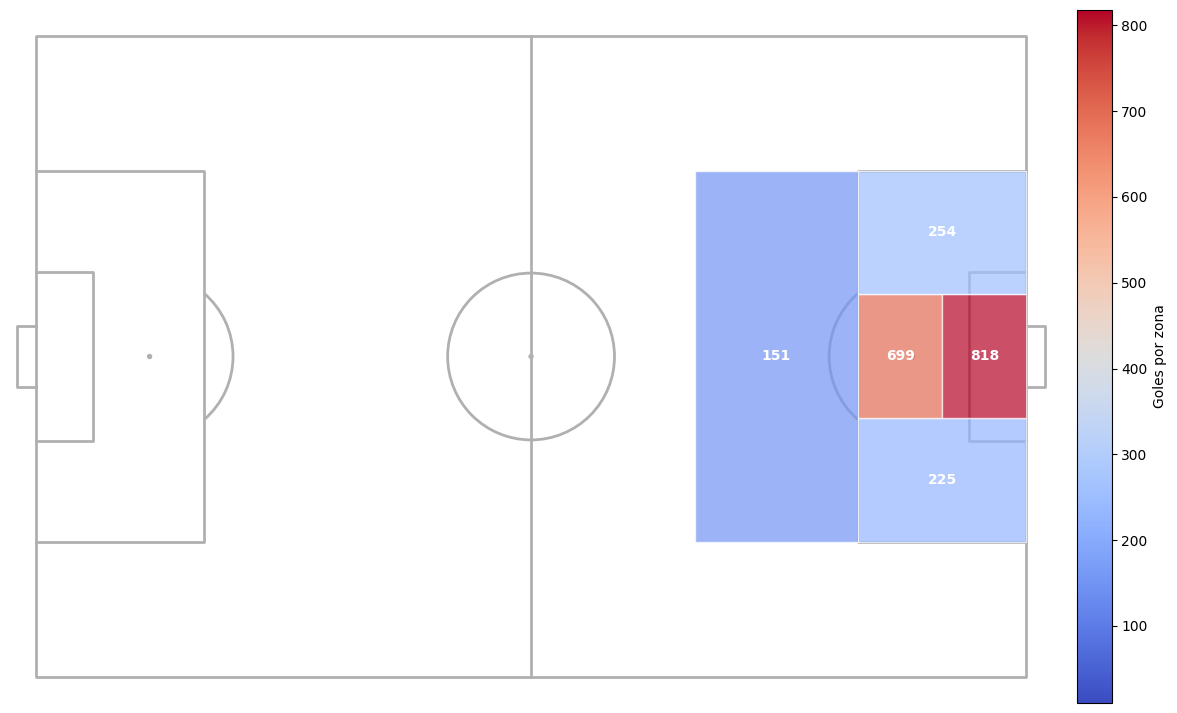

In [24]:
# Importar librerías necesarias
from statsbombpy import sb
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mplsoccer import Pitch, VerticalPitch

# Definir zonas del campo
zone_areas = {
    'zone_17a': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 21.1, 'y_upper_bound': 40.43
    },
    'zone_17b1': {  # LADO IZQUIERDO
        'x_lower_bound': 83, 'x_upper_bound': 91.5,
        'y_lower_bound': 40.43, 'y_upper_bound': 59.76
    },
    'zone_17b2': {  # LADO DERECHO
        'x_lower_bound': 91.5, 'x_upper_bound': 100,
        'y_lower_bound': 40.43, 'y_upper_bound': 59.76
    },
    'zone_17c': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 59.76, 'y_upper_bound': 78.9
    },
    'zone_14': {
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9
    },
}

# Asegurate de que las coordenadas estén en escala Opta (0 a 100)
# Si tus datos vienen en StatsBomb (0-120 x, 0-80 y), transformalos:
remates['x_opta'] = remates['x'] * (100 / 120)
remates['y_opta'] = remates['y'] * (100 / 80)

 
# Función para asignar zonas
def assign_shot_zone(x, y):
    for zone, bounds in zone_areas.items():
        if (x >= bounds['x_lower_bound']) and (x <= bounds['x_upper_bound']):
            if (y >= bounds['y_lower_bound']) and (y <= bounds['y_upper_bound']):
                return zone
    return 'zona desconocida'

# Aplicar la función para obtener la zona
remates['zona'] = remates.apply(lambda row: assign_shot_zone(row['x_opta'], row['y_opta']), axis=1)
 

# Filtrar remates con pie derecho
remates_derecha = remates[remates['players_foot'] == 'right']

# Luego agrupar y contar goles y remates en esas condiciones
zonas_stats = remates_derecha.groupby('zona').agg(
    remates_totales=('zona', 'count'),
    goles=('goal', 'sum')
).reset_index()

# Ahora sí creas el diccionario
goles_dict = dict(zip(zonas_stats['zona'], zonas_stats['goles']))

# Crear cancha tipo Opta
fig = plt.figure(figsize=(16, 9), dpi=100)
ax = plt.subplot(111)
pitch = Pitch(pitch_type='opta', goal_type='box')
pitch.draw(ax=ax)

# Color map
cmap = plt.cm.coolwarm
vmin = zonas_stats['goles'].min()
vmax = zonas_stats['goles'].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Pintar cada zona
for zone, bounds in zone_areas.items():
    goles = goles_dict.get(zone, 0)  # Si no hay datos, usa 0
    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=cmap(norm(goles)),
        alpha=0.7,
        ec='white'
    )
    ax.add_patch(rect)
    
    # Texto con goles
    ax.text(
        x=(bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        y=(bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        s=f"{goles}",
        color='white',
        ha='center',
        va='center',
        fontsize=10,
        weight='bold'
    )

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Goles por zona', color='black')
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
plt.show()


In [25]:
#Dividir la cancha en 2 para ver si el jugador patea con chanfle siendo derecho o izquierdo.

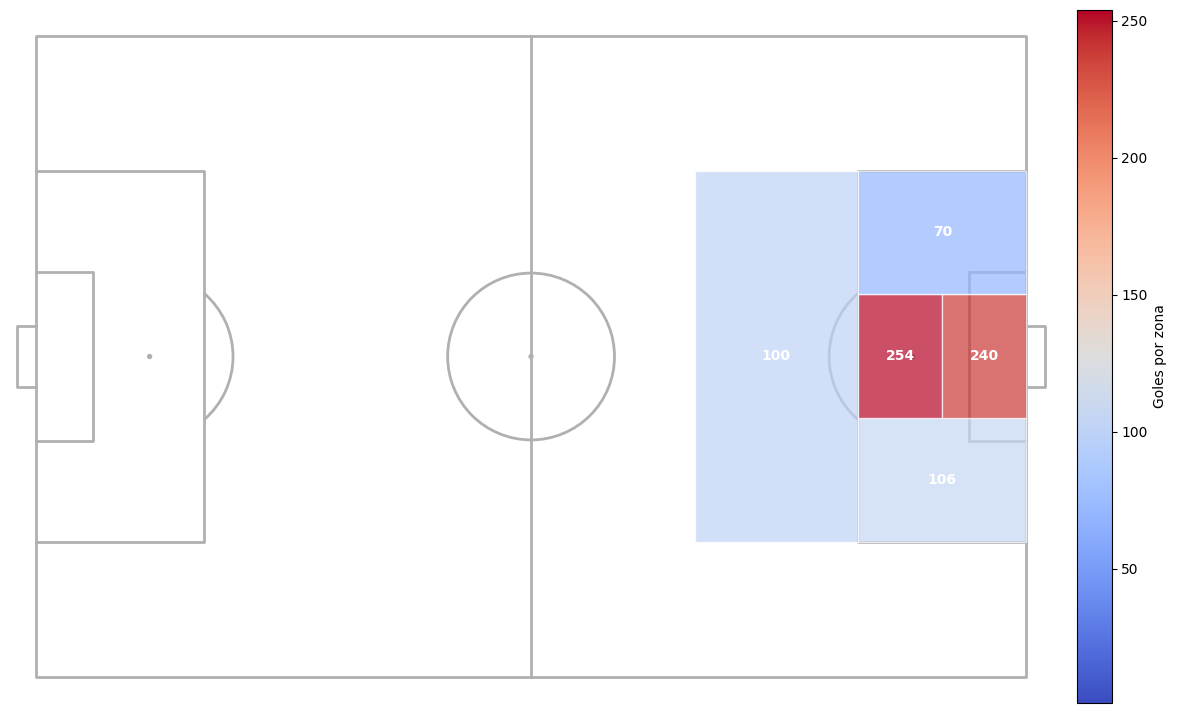

In [26]:
# Importar librerías necesarias
from statsbombpy import sb
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mplsoccer import Pitch, VerticalPitch

# Definir zonas del campo
zone_areas = {
    'zone_17a': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 21.1, 'y_upper_bound': 40.43
    },
    'zone_17b1': {  # LADO IZQUIERDO
        'x_lower_bound': 83, 'x_upper_bound': 91.5,
        'y_lower_bound': 40.43, 'y_upper_bound': 59.76
    },
    'zone_17b2': {  # LADO DERECHO
        'x_lower_bound': 91.5, 'x_upper_bound': 100,
        'y_lower_bound': 40.43, 'y_upper_bound': 59.76
    },
    'zone_17c': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 59.76, 'y_upper_bound': 78.9
    },
    'zone_14': {
        'x_lower_bound': 66.5, 'x_upper_bound': 83,
        'y_lower_bound': 21.1, 'y_upper_bound': 78.9
    },
}

# Asegurate de que las coordenadas estén en escala Opta (0 a 100)
# Si tus datos vienen en StatsBomb (0-120 x, 0-80 y), transformalos:
remates['x_opta'] = remates['x'] * (100 / 120)
remates['y_opta'] = remates['y'] * (100 / 80)

# Aplicar la función para obtener la zona
remates['zona'] = remates.apply(lambda row: assign_shot_zone(row['x_opta'], row['y_opta']), axis=1)
 
 
# Función para asignar zonas
def assign_shot_zone(x, y):
    for zone, bounds in zone_areas.items():
        if (x >= bounds['x_lower_bound']) and (x <= bounds['x_upper_bound']):
            if (y >= bounds['y_lower_bound']) and (y <= bounds['y_upper_bound']):
                return zone
    return 'zona desconocida'

# Filtrar remates con pie derecho
remates_derecha = remates[remates['players_foot'] == 'left']

# Luego agrupar y contar goles y remates en esas condiciones
zonas_stats = remates_derecha.groupby('zona').agg(
    remates_totales=('zona', 'count'),
    goles=('goal', 'sum')
).reset_index()

# Ahora sí creas el diccionario
goles_dict = dict(zip(zonas_stats['zona'], zonas_stats['goles']))

# Crear cancha tipo Opta
fig = plt.figure(figsize=(16, 9), dpi=100)
ax = plt.subplot(111)
pitch = Pitch(pitch_type='opta', goal_type='box')
pitch.draw(ax=ax)

# Color map
cmap = plt.cm.coolwarm
vmin = zonas_stats['goles'].min()
vmax = zonas_stats['goles'].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

# Pintar cada zona
for zone, bounds in zone_areas.items():
    goles = goles_dict.get(zone, 0)  # Si no hay datos, usa 0
    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=cmap(norm(goles)),
        alpha=0.7,
        ec='white'
    )
    ax.add_patch(rect)
    
    # Texto con goles
    ax.text(
        x=(bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        y=(bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        s=f"{goles}",
        color='white',
        ha='center',
        va='center',
        fontsize=10,
        weight='bold'
    )

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Goles por zona', color='black')
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')
plt.show()


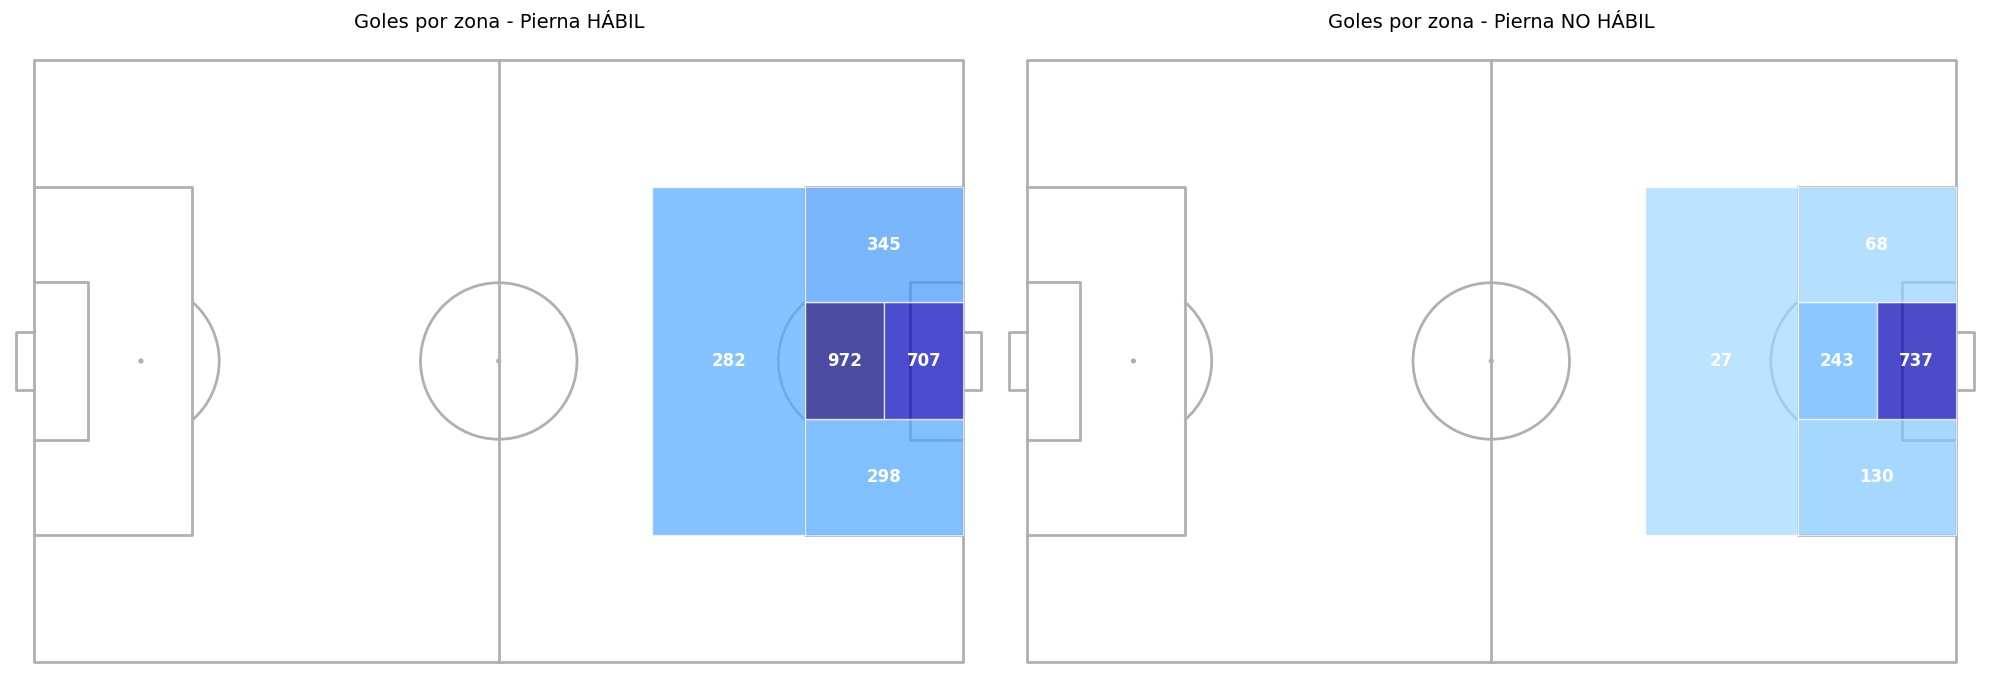

In [27]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mplsoccer import Pitch

# ===========================
# Definición de zonas
# ===========================
zone_areas = {
    'zone_17a': {'x_lower_bound': 83, 'x_upper_bound': 100, 'y_lower_bound': 21.1, 'y_upper_bound': 40.43},
    'zone_17b1': {'x_lower_bound': 83, 'x_upper_bound': 91.5, 'y_lower_bound': 40.43, 'y_upper_bound': 59.76},
    'zone_17b2': {'x_lower_bound': 91.5, 'x_upper_bound': 100, 'y_lower_bound': 40.43, 'y_upper_bound': 59.76},
    'zone_17c': {'x_lower_bound': 83, 'x_upper_bound': 100, 'y_lower_bound': 59.76, 'y_upper_bound': 78.9},
    'zone_14': {'x_lower_bound': 66.5, 'x_upper_bound': 83, 'y_lower_bound': 21.1, 'y_upper_bound': 78.9},
}

def assign_shot_zone(x, y):
    for zone, bounds in zone_areas.items():
        if (bounds['x_lower_bound'] <= x <= bounds['x_upper_bound']) and (bounds['y_lower_bound'] <= y <= bounds['y_upper_bound']):
            return zone
    return 'zona desconocida'

# ===========================
# Procesamiento de datos
# ===========================
# Escalar coordenadas a escala Opta
remates['x_opta'] = remates['x'] * (100 / 120)
remates['y_opta'] = remates['y'] * (100 / 80)

# Asignar zonas
remates['zona'] = remates.apply(lambda row: assign_shot_zone(row['x_opta'], row['y_opta']), axis=1)

# Extraer 'left' o 'right' del shot_body_part
remates['players_foot'] = remates['shot_body_part'].str.lower().str.extract(r'(left|right)')

# Filtrar remates con el pie
remates_pie = remates[remates['players_foot'].notna()]

# Inferir pierna hábil por jugador
pierna_habil_inferida = remates_pie.groupby('player')['players_foot'].agg(lambda x: x.mode()[0])
remates['dominant_foot'] = remates['player'].map(pierna_habil_inferida)

# Comparar si el tiro fue con la pierna hábil
remates['con_pierna_habil'] = remates['players_foot'] == remates['dominant_foot']

# Filtrar remates con y sin pierna hábil
remates_habil = remates[remates['con_pierna_habil'] == True]
remates_no_habil = remates[remates['con_pierna_habil'] == False]

# ===========================
# Función para estadísticas
# ===========================
def get_stats(df):
    return df.groupby('zona').agg(
        remates_totales=('zona', 'count'),
        goles=('goal', 'sum')
    ).reset_index()

stats_habil = get_stats(remates_habil)
stats_no_habil = get_stats(remates_no_habil)

goles_habil = dict(zip(stats_habil['zona'], stats_habil['goles']))
goles_no_habil = dict(zip(stats_no_habil['zona'], stats_no_habil['goles']))

# ===========================
# Visualización
# ===========================
fig, axs = plt.subplots(1, 2, figsize=(20, 9))

pitch_habil = Pitch(pitch_type='opta', goal_type='box')
pitch_no_habil = Pitch(pitch_type='opta', goal_type='box')

pitch_habil.draw(ax=axs[0])
pitch_no_habil.draw(ax=axs[1])


colores = [ "#A9DEFF","#44A1FF", '#0000CD',"#00007C"]
cmap = LinearSegmentedColormap.from_list("azul_gradiente", colores)
vmax_global = max(stats_habil['goles'].max(), stats_no_habil['goles'].max())
norm = plt.Normalize(vmin=0, vmax=vmax_global)

# Graficar - Pierna hábil
for zone, bounds in zone_areas.items():
    goles = goles_habil.get(zone, 0)
    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=cmap(norm(goles)), alpha=0.7, ec='white'
    )
    axs[0].add_patch(rect)
    axs[0].text(
        (bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        (bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        str(goles), color='white', ha='center', va='center', fontsize=12, weight='bold'
    )
axs[0].set_title('Goles por zona - Pierna HÁBIL', fontsize=14)

# Graficar - Pierna no hábil
for zone, bounds in zone_areas.items():
    goles = goles_no_habil.get(zone, 0)
    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=cmap(norm(goles)), alpha=0.7, ec='white'
    )
    axs[1].add_patch(rect)
    axs[1].text(
        (bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        (bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        str(goles), color='white', ha='center', va='center', fontsize=12, weight='bold'
    )
axs[1].set_title('Goles por zona - Pierna NO HÁBIL', fontsize=14)




plt.tight_layout()
plt.show()


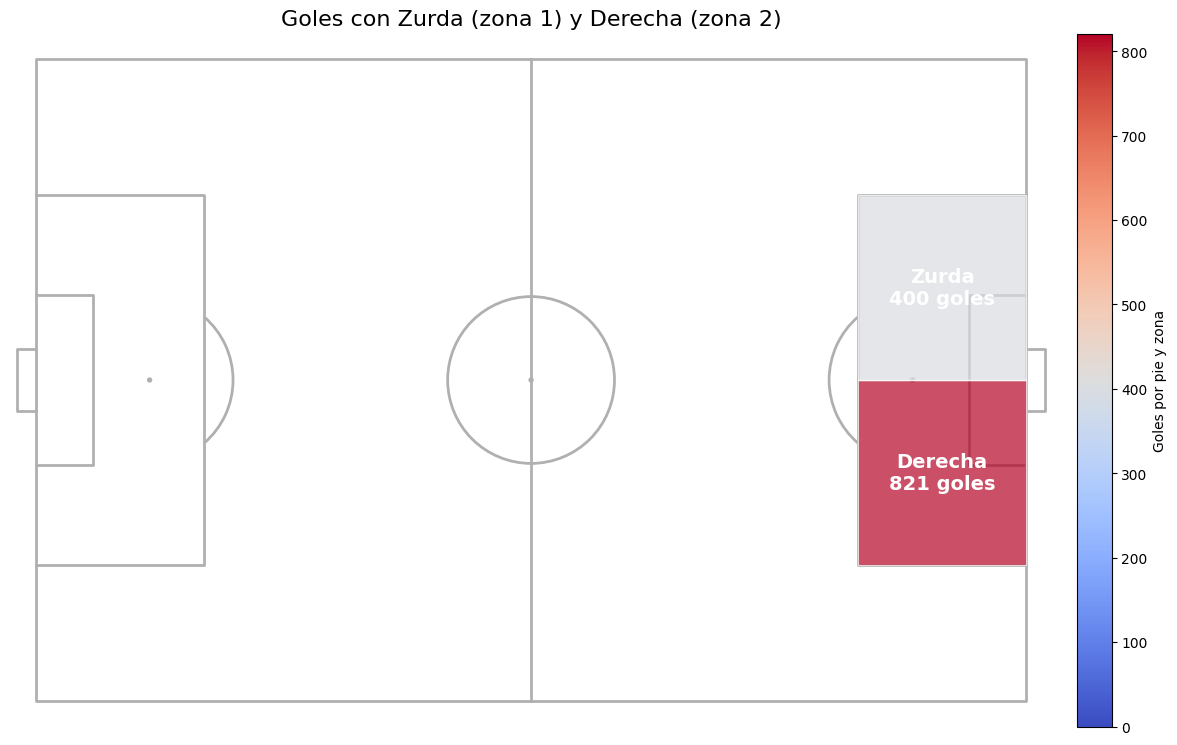

In [28]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mplsoccer import Pitch

# Definir zonas horizontales (2 zonas)
zone_areas = {
    'zone_1': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 21.1, 'y_upper_bound': 50
    },
    'zone_2': {
        'x_lower_bound': 83, 'x_upper_bound': 100,
        'y_lower_bound': 50, 'y_upper_bound': 78.9
    },
}

def assign_shot_zone(x, y):
    for zone, bounds in zone_areas.items():
        if bounds['x_lower_bound'] <= x <= bounds['x_upper_bound'] and bounds['y_lower_bound'] <= y <= bounds['y_upper_bound']:
            return zone
    return 'zona desconocida'

# Escalar coordenadas StatsBomb a Opta (0-100)
remates['x_opta'] = remates['x'] * (100 / 120)
remates['y_opta'] = remates['y'] * (100 / 80)

# Aplicar asignación de zona
remates['zona'] = remates.apply(lambda row: assign_shot_zone(row['x_opta'], row['y_opta']), axis=1)

# Filtrar remates por pie y zona correspondiente
remates_zurda = remates[(remates['players_foot'] == 'right') & (remates['zona'] == 'zone_1')]
remates_derecha = remates[(remates['players_foot'] == 'left') & (remates['zona'] == 'zone_2')]

# Contar goles por zona
goles_zurda = remates_zurda['goal'].sum()
goles_derecha = remates_derecha['goal'].sum()

# Preparar stats para pintar (asumimos 0 en la zona que no corresponde)
zonas_stats = pd.DataFrame({
    'zona': ['zone_1', 'zone_2'],
    'goles': [goles_zurda, goles_derecha]
})

goles_dict = dict(zip(zonas_stats['zona'], zonas_stats['goles']))

# Crear cancha tipo Opta
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)
pitch = Pitch(pitch_type='opta', goal_type='box')
pitch.draw(ax=ax)

# Color map para los goles
cmap = plt.cm.coolwarm
vmin = 0
vmax = max(goles_zurda, goles_derecha)
norm = plt.Normalize(vmin=vmin, vmax=vmax if vmax > 0 else 1)  # evitar div/0 si no hay goles

# Pintar las dos zonas
for zone, bounds in zone_areas.items():
    goles = goles_dict.get(zone, 0)
    rect = Rectangle(
        (bounds['x_lower_bound'], bounds['y_lower_bound']),
        bounds['x_upper_bound'] - bounds['x_lower_bound'],
        bounds['y_upper_bound'] - bounds['y_lower_bound'],
        color=cmap(norm(goles)),
        alpha=0.7,
        ec='white'
    )
    ax.add_patch(rect)
    
    # Texto con goles
    texto_pie = "Zurda" if zone == 'zone_2' else "Derecha"
    ax.text(
        x=(bounds['x_lower_bound'] + bounds['x_upper_bound']) / 2,
        y=(bounds['y_lower_bound'] + bounds['y_upper_bound']) / 2,
        s=f"{texto_pie}\n{goles} goles",
        color='white',
        ha='center',
        va='center',
        fontsize=14,
        weight='bold'
    )

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Goles por pie y zona', color='black')
cbar.ax.yaxis.set_tick_params(color='black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')

plt.title("Goles con Zurda (zona 1) y Derecha (zona 2)", fontsize=16)
plt.show()


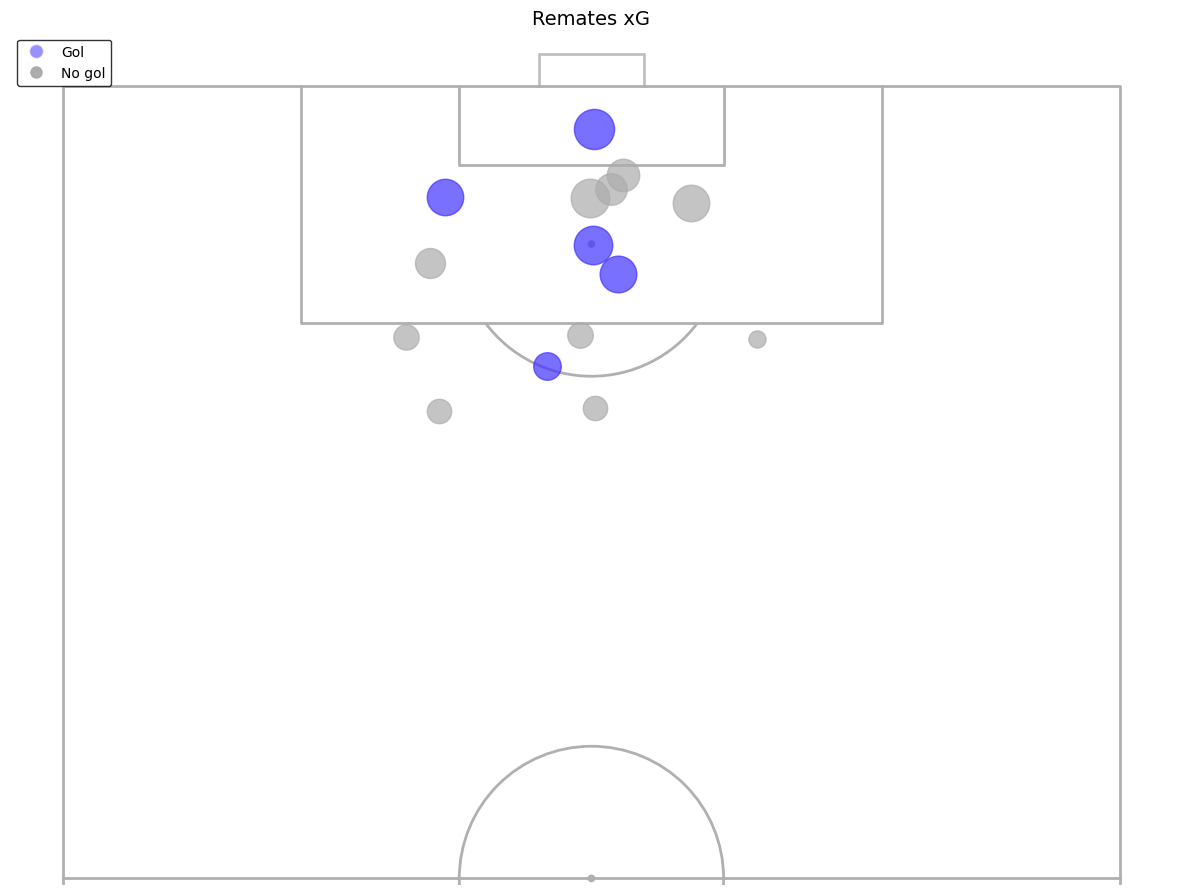

In [30]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt
rematesxG = pd.read_csv('rematesxG.csv')
# Tomar 7 remates con gol y 7 sin gol
goles = rematesxG[rematesxG['goal'] == 1].sample(n=5, random_state=42)
no_goles = rematesxG[rematesxG['goal'] == 0].sample(n=10, random_state=42)

# Combinar ambos
muestra = pd.concat([goles, no_goles]).reset_index(drop=True)

# Crear la cancha vertical
pitch = VerticalPitch(pad_bottom=0.5, half=True, goal_type='box', goal_alpha=0.8)
fig, ax = pitch.draw(figsize=(12, 9))
fig.set_facecolor('white')
ax.set_facecolor('white')

# Factor para tamaño de los círculos
factor_tamano =1000

# Dibujar remates
for i, row in muestra.iterrows():
    color = "#4033FF8A" if row['goal'] == 1 else "#ACACACFF"
    tamaño = row['xG'] * factor_tamano
    pitch.scatter(row['x'], row['y'], s=tamaño, color=color, alpha=0.7, ax=ax)
    
    # Agregar texto con el xG sobre el círculo

# Leyenda manual
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Gol', markerfacecolor="#4033FF8A", markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='No gol', markerfacecolor="#ACACACFF", markersize=10)
]
ax.legend(handles=handles, loc='upper left', frameon=True, facecolor='white', edgecolor='black')

# Título
ax.set_title("Remates xG", fontsize=14)

plt.show()

